# Линейная регрессия

**Регрессия** — это одна из трех базовых задач машинного обучения (классификация, регрессия, кластеризация).

В задаче **регрессии** мы используем входные **признаки**, чтобы предсказать **целевые значения**. Например, чтобы предсказать температуру воздуха над населённым пунктом на следующий день, если известны различные характеристики на текущий момент времени (влажность воздуха, скорость и направление ветра, плотность застройки или наличие промышленных объектов, и т.п.)


##  Модель и ее параметры

Предположим, у нас есть набор точек $\{(x_i, y_i)\}$.

Цель линейной регрессии — **поиск линии, которая наилучшим образом соответствует заданным точкам**. Напомним, что уравнение прямой:

$$\large f(x) = w⋅x + b,$$

где $w$ — характеризует наклон линии (в будущем мы будем называть значения $w$ весом, weight) а $b$ — её сдвиг по оси $y$ (bias). Таким образом, решение линейной регрессии определяет значения для $w$ и $b$ так, что $f(x)$ приближается как можно ближе к $y(x)$. Здесь $w$ и $b$ — **параметры модели**.

Отобразим на графике случайные точки, расположенные в окрестности $y(x) = 3⋅x + 2$

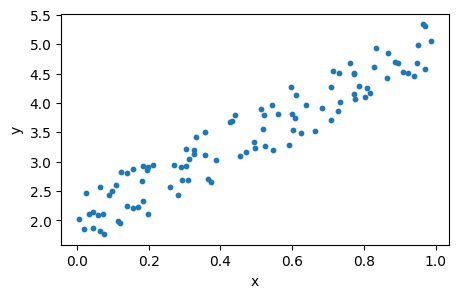

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
x = np.random.rand(100, 1)
y = 2 + 3 * x + (np.random.rand(100, 1) - 0.5)

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Предположим, что нам неизвестны параметры наклона и сдвига $w$ и $b$. Для их определения мы бы могли рассмотреть все возможные прямые вида $f(x) = w⋅x + b$ и выбрать среди семейства прямых такую, которая лучше всего приближает имеющиеся данные:

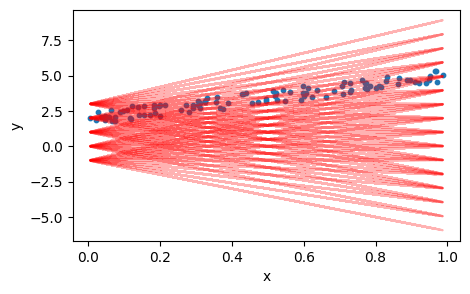

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + w * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Модель** $f(x) = w⋅x + b$ задаёт параметрическое семейство функций, а **выбор "правильного" представителя** из **параметрического семейства** и называется **обучением** модели:

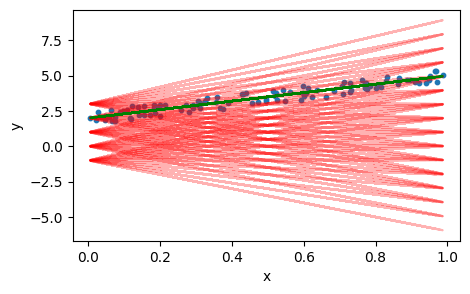

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + w * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.plot(x, 2 + 3 * x, color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Функция потерь

Как выбрать параметры?

**Функция потерь** позволяет вычислить меру количества ошибок. Для задачи **регрессии** такой мерой может быть **расстояние** между предсказанным значением $f(x)$ и его фактическим значением. Распространенной функцией потерь является **средняя квадратичная ошибка** (MSE).

Мы определяем ошибку модели на одном объекте как квадрат расстояния $l_i$ между предсказанием $f(x_i)$ и истинным значением $y_i$, а общая функция потерь будет задана выражением:

$$l_i =|f(x_i)-y_i| $$

$$ \text{Loss} = \frac{1}{N}\sum l_i^2 = \frac{1}{N} \sum (f(x_i)-y_i)^2$$

Для прямой с параметрами $w=4$, $b = 2$ и $w=3$, $b = 2$ (верные значения):

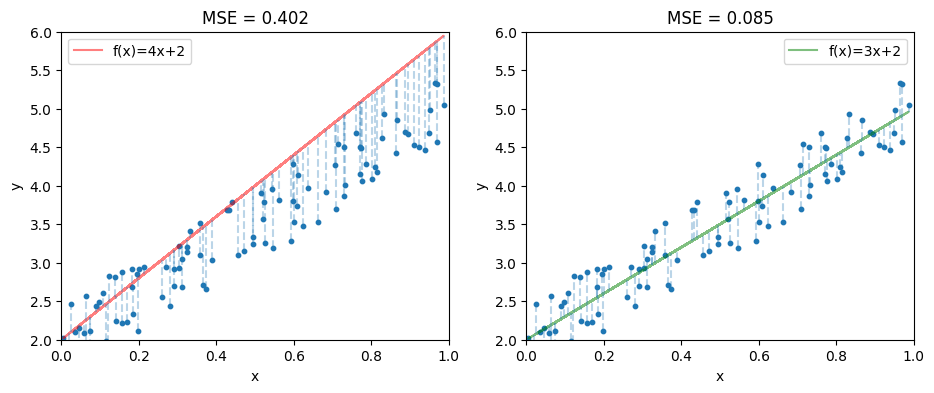

In [ ]:
def plot_delta_line(ax, x, y, w, b, color="r"):
    y_predicted = w * x + b
    # line
    ax.plot(x, y_predicted, color=color, alpha=0.5, label=f"f(x)={w}x+{b}")
    # delta
    for x_i, y_i, f_x in zip(x, y, y_predicted):
        ax.vlines(x=x_i, ymin=min(f_x, y_i), ymax=max(f_x, y_i), ls="--", alpha=0.3)
    # MSE
    loss = np.sum((y - (w * x + b)) ** 2) / (len(x))
    ax.set_title(f"MSE = {loss:.3f}")
    ax.legend()


fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# plot x_i y_i (dots)
for ax in axs:
    ax.scatter(x, y, s=10)
    ax.set_xlim([0, 1])
    ax.set_ylim([2, 6])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plot_delta_line(axs[0], x, y, w=4, b=2, color="r")
plot_delta_line(axs[1], x, y, w=3, b=2, color="g")

plt.show()

Задача **поиска оптимальных параметров** модели сводится к задаче **поиска минимума функции потерь**.

## Поиск локального минимума

Посмотрим, как будет выглядеть ландшафт функции потерь для задачи линейной регрессии.

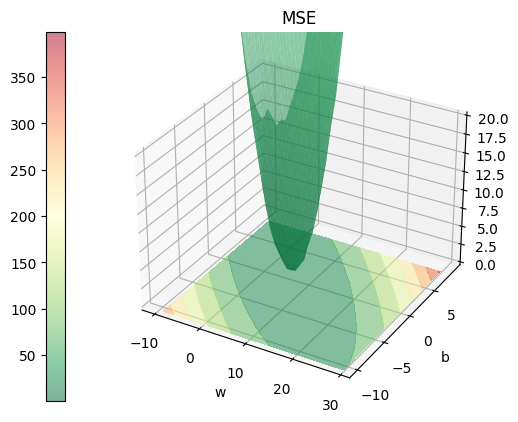

In [ ]:
w = np.arange(-10, 30, 1)
b = np.arange(-10, 10, 1)

w, b = np.meshgrid(w, b)

loss = np.zeros_like(w)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        loss[i, j] = np.sum((y - (w[i, j] * x + b[i, j])) ** 2) / (len(x))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(w, b, loss, cmap=plt.cm.RdYlGn_r, alpha=0.5)

ax.contourf(w, b, loss, zdir="z", offset=-1, cmap="RdYlGn_r", alpha=0.5)
ax.set_zlim(0, 20)

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_title("MSE")

fig.colorbar(surf, location="left")
plt.show()

Необходимым (но недостаточным) условием локального минимума дифференцируемой функции является равенство нулю частных производных:

$$	\begin{equation*}
 \begin{cases}
   \displaystyle\frac{\partial \text{Loss}}{\partial w}=0,
   \\
   \displaystyle\frac{\partial \text{Loss}}{\partial b}=0.
 \end{cases}
\end{equation*} $$

Т.к. MSE для линейной регрессии — полином второй степени относительно $w$ и $b$, а полином второй степени не может иметь больше одного экстремума, то локальный минимум будет глобальным.

##  Метод наименьших квадратов

Реализуем простейшую модель линейной регрессии с использованием библиотеки NumPy на датасете, определённом выше.

Используем метод наименьших квадратов: [МНК, простейшие частные случаи 📚[wiki]](https://ru.wikipedia.org/wiki/Метод_наименьших_квадратов#Простейшие_частные_случаи).

$$w = \frac{n\sum_{i=1}^nx_iy_i - (\sum_{i=1}^nx_i)(\sum_{i=1}^ny_i)}{n\sum_{i=1}^nx_t^2 - (\sum_{i=1}^n x_t)^2};$$

$$b = \frac{\sum_{i=1}^ny_i - w(\sum_{i=1}^nx_i)}{n}.$$

По сути метод наименьших квадратов — это решение системы уравнений выше.

Estimated coefficients:
b = 2.014 
w = 2.966
Final equation: 
y = 2.966x +2.014


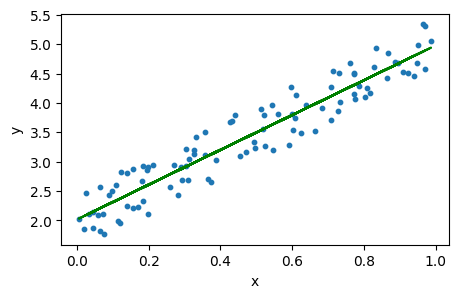

In [ ]:
def estimate_coef(x, y):
    n = len(x)
    w = (n * sum(np.multiply(x, y)) - sum(x) * sum(y)) / (
        n * sum(np.multiply(x, x)) - sum(x) ** 2
    )
    b = (sum(y) - w * sum(x)) / n
    return w, b


w, b = estimate_coef(x, y)

y_predicted = w * x + b

print(f"Estimated coefficients:\nb = {b[0]:.3f} \nw = {w[0]:.3f}")
print(f"Final equation: \ny = {w[0]:.3f}x +{b[0]:.3f}")

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.plot(x, y_predicted, color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Полученное решение близко к исходной  зависимости $y=3\cdot x + 2$.

Для многомерного случая МНК можно записать [решение 📚[book]](https://sun.tsu.ru/mminfo/2016/Dombrovski/book/chapter-3/chapter-3-2.htm) в матричном виде:  
$$\vec w = (X^TX)^{-1}X^T\vec y$$

где $\vec w$ — вектор параметров модели, включающий $b$,

$X$ — матрица входных признаков,

$\vec y$ — вектор предсказываемых значений.



## Метрики регрессии

С одной из метрик регрессии мы уже познакомились: это $\text{MSE}$, которую мы минимизировали в методе наименьших квадратов. Стоит отметить, что $\text{MSE}$ имеет [размерность 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) квадрата размерности предсказываемого значения.

$$ \text{MSE}  = \frac{1}{N} \sum (y_i - f(x_i))^2$$

Чтобы получить оценку ошибки той же размерности, можно взять корень (root) от $\text{MSE}$. Это метрика $\text{RMSE}$:

$$ \text{RMSE} = \sqrt{\frac{1}{N} \sum (y_i - f(x_i))^2}$$

Или посчитать среднюю абсолютную ошибку $\text{MAE}$:

$$ \text{MAE} = \frac{1}{N} \sum |y_i - f(x_i)|$$



Существуют и более специфичные метрики, например, $R^2$, которая принимает значения от $(-\inf, 1]$, где $1$  —  наилучший вариант. $R^2$ называется [коэффициентом детерминации 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) и характеризует долю дисперсии целевого значения, которую объясняет модель.

$$R^2 = 1 - \frac{\text{MSE}}{\sigma^2}=1 - \frac{\sum {(y_i-f(x_i))^2}}{\sum{(y_i-\bar{y})^2}},$$

$$\bar{y} = \frac{1}{N}\sum {y_i},$$

где $\sigma^2$ — дисперсия.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error


def print_metrics(y_true, y_predicted):
    print(f"Mean squared error: {mean_squared_error(y_true, y_predicted):.3f}")
    print(
        "Root mean squared error: ",
        f"{root_mean_squared_error(y_true, y_predicted):.3f}",
    )
    print(f"Mean absolute error: {mean_absolute_error(y_true, y_predicted):.3f}")
    print(f"R2 score: {r2_score(y_true, y_predicted):.3f}")


print_metrics(y, y_predicted)

Mean squared error: 0.085
Root mean squared error:  0.291
Mean absolute error: 0.256
R2 score: 0.901


Подробнее про метрики можно почитать [тут 📚[book]](https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii). Там же вы можете найти информацию об относительных ошибках, выражаемых в процентах.


<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L02/linear_regression.png" width="600"></center>

<center><em>Когда $R^2$ около нуля, модель плохо объясняет данные</em></center>

<center><em>Source: <a href="https://xkcd.com/1725">https://xkcd.com/1725</a></em></center>

## Модель линейной регрессии из библиотеки scikit-learn

Свою линейную регрессию мы написали. Теперь поработаем с моделью из Sklearn.

Рассмотрим задачу предсказания успеваемости студента на основе информации о количестве потраченного им на изучение материала времени в часах.

Загрузим датасет [Students Score 🛠️[doc]](https://www.kaggle.com/datasets/shubham47/students-score-dataset-linear-regression). Датасет содержит два числовых значения — часы и результаты.

In [ ]:
import pandas as pd

dataset = pd.read_csv(
    "https://ml.gan4x4.ru/msu/datasets/student_scores.csv"
)
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Построим график зависимости результата от затраченного времени, а также отобразим распределения каждой из переменных

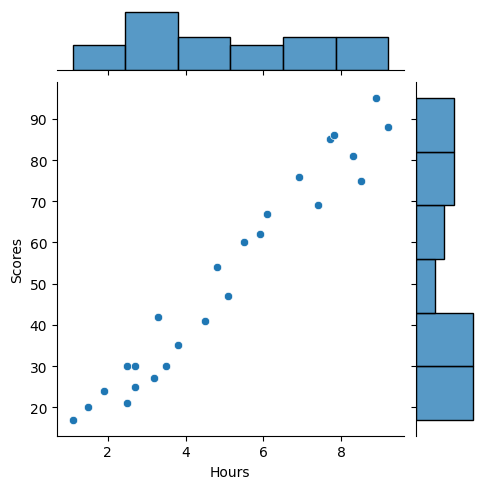

In [ ]:
import seaborn as sns

sns.jointplot(data=dataset, x="Hours", y="Scores", height=5)
plt.show()

Разделим наши данные на train и test:

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, 1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

В случае мультимодального (несколько пиков) распределения значений целевой переменной в задаче регрессии может быть полезно задуматься о стратификации данных. Стратификация данных для задачи регрессии специфична и не реализована в Sklearn, о ней можно почитать в [Regression Analysis Based on Stratified Samples 🎓[article]](https://www.jstor.org/stable/2336525?seq=1), пример кода можно найти на [форуме ✏️[blog]](https://datascience.stackexchange.com/questions/33140/stratify-on-regression).

Теперь создадим модель для линейной регрессии. Чтобы не писать с нуля, воспользуемся готовой моделью из библиотеки Sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

Обучим ее:

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

Посмотрим, что получилось:

In [ ]:
x_train.shape

(20, 1)

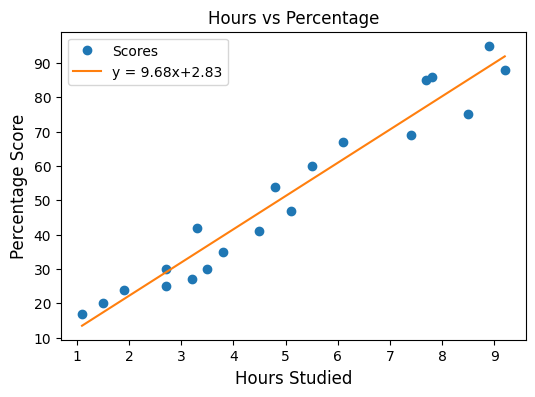

In [ ]:
x_points = np.linspace(min(x_train), max(x_train), 100)  # 100 dots at min to max
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_train, y_train, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Теперь сделаем предсказание для тестовой выборки:

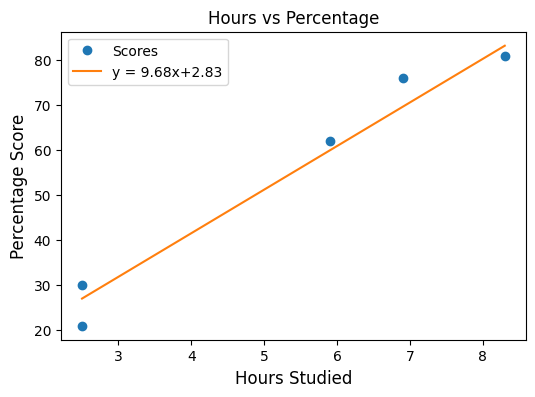

In [ ]:
y_pred = regressor.predict(x_test)

x_points = np.linspace(min(x_test), max(x_test), 100)
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_test, y_test, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Выглядит неплохо.

Посчитаем метрики для наших значений:

In [ ]:
y_pred = regressor.predict(x_test)
print_metrics(y_test, y_pred)

Mean squared error: 18.943
Root mean squared error:  4.352
Mean absolute error: 3.921
R2 score: 0.968


Будьте осторожнее: модели отражают только те закономерности, которые видели в данных. Вероятность того, что студент, потративший на подготовку 20 часов, получит больше максимального балла, мала.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L02/extrapolating.png" width="500"></center>

<center><em>Source: <a href="https://xkcd.com/605">https://xkcd.com/605</a></em></center>



